## Algoritma Page Rank

In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Mendefinisikan array
myWeb = nx.DiGraph()
myPages = range(1,5)

In [6]:
# Menarik garis koneksi
connections = [(1,3),(2,1),(2,3),(3,1),(3,2),(3,4),(4,5),(5,1),(5,4)]
myWeb.add_nodes_from(myPages)
myWeb.add_edges_from(connections)

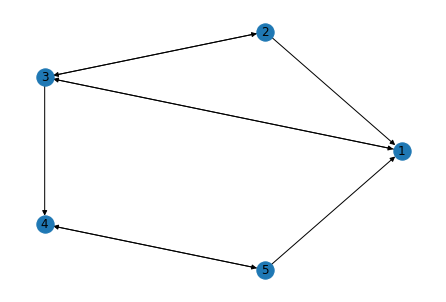

In [7]:
# Melakukan plotting
pos=nx.shell_layout(myWeb)
nx.draw(myWeb, pos, arrows = True, with_labels = True)
plt.show()

### Tabel perhitungan PR secara manual

In [17]:
def createPageRank(aGraph):
    nodes_set = len(aGraph)
    M = nx.to_numpy_matrix(aGraph)
    outwards = np.squeeze(np.asarray(np.sum(M, axis=1)))
    prob_outwards = np.array(
        [1.0/count
        if count>0 else 0.0 for count in outwards])
    G = np.asarray(np.multiply(M.T, prob_outwards))
    p = np.ones(nodes_set)/float(nodes_set)
    if np.min(np.sum(G,axis=0)) < 1.0:
        print('WARN : G Is substochastic')
    return G,p

In [18]:
G,p = createPageRank(myWeb)
print(G)

[[0.         0.5        0.33333333 0.         0.5       ]
 [0.         0.         0.33333333 0.         0.        ]
 [1.         0.5        0.         0.         0.        ]
 [0.         0.         0.33333333 0.         0.5       ]
 [0.         0.         0.         1.         0.        ]]
